In [ ]:
!pip install wandb


import numpy as np
import wandb
import random
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
!wandb login --relogin


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:

X, y =  make_blobs(n_samples=200, centers=[[2,4],[4,2]], random_state=20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
class LogisticRegression():
    def __init__(self, learning_rate, threshold=0.5):
        '''

        This function will initiate the hyparameters we can fix in the classiciation problem

        learning_rate: The learning rate used in the SGD update
        threshold: The threshold of class change

        '''
        self.learning_rate = learning_rate
        self.threshold = threshold
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def forward(self, x):
        return self.sigmoid(np.dot(self.parameters, x) + self.bias)
        pass
    def back():
        pass
    def loss(self, y, y_hat):
        '''

        Cross entropy loss
        y: true label
        y_hat: prediction

        '''
        return -1*(y*(np.log(y_hat)) + (1-y)*(np.log(1-y_hat)))
        pass
    def fit(self, x, y, epochs):
        '''

        This functio is used to both fit and predict loss functions

        '''
        wandb.init(
            project="smai-again",
            config={
            "learning_rate": 0.02,
            "architecture": "Architecture Name",
            "dataset": "Dataset Name"
            }
        )


        self.parameters, gradient = np.zeros(x[0].shape), np.zeros(x[0].shape)
        self.bias = 0
        bias_gradient = 0
        preds = [0]*(len(y))
        for _ in range(epochs):
            net_loss = 0
            diff = 0
            for i in range(len(x)):
              # Calculating the sort of prediction value (the probability of the sample x[i] being in class 1)
                # y_hat = self.sigmoid(np.dot(self.parameters, x[i]) + self.bias)
                y_hat = self.forward(x[i])
                # net_loss += -1*(y[i]*(np.log(y_hat)) + (1-y[i])*(np.log(1-y_hat)))
                net_loss += self.loss(y[i], y_hat)
                diff = y_hat - y[i]
                preds[i]=self.process(y_hat)
                gradient += self.learning_rate*(diff)*x[i]
                bias_gradient += self.learning_rate*(diff)
            avg_loss = net_loss/len(y)
            accuracy = self.eval(preds, y)
            gradient /= len(y)
            bias_gradient /= len(y)
            self.parameters -= self.learning_rate*(gradient)
            self.bias -= self.learning_rate*(bias_gradient)
            print(f"Loss {avg_loss}, Accuracy {accuracy}")
            wandb.log({"Accuracy": accuracy, "Average Loss": avg_loss})
            pass
        wandb.finish()
    def process(self, z):
        if(z > self.threshold):
            return 1
        else:
            return 0
    def predict(self, x_test):
        y_pred = []
        for i in range(len(x_test)):
            y_pred += [self.process(self.sigmoid(np.dot(self.parameters, x_test[i]) + self.bias))]
        y_pred = np.array(y_pred)
        return y_pred
    def eval(self, y, y_hat):
        score = 0
        for i in range(len(y)):
            if(y[i] == y_hat[i]):
                score += 1
        return score/len(y)*100

In [ ]:

x = LogisticRegression(learning_rate=0.01)

x.fit(x_train, y_train, epochs = 1000)
y_pred = x.predict(x_test)





Loss 0.6931471805599464, Accuracy 47.5
Loss 0.6931021774214174, Accuracy 89.375
Loss 0.6930569000141034, Accuracy 89.375
Loss 0.6930116279025995, Accuracy 89.375
Loss 0.6929663628322482, Accuracy 89.375
Loss 0.6929211048120255, Accuracy 89.375
Loss 0.6928758538400538, Accuracy 89.375
Loss 0.6928306099143884, Accuracy 89.375
Loss 0.6927853730330867, Accuracy 89.375
Loss 0.6927401431942076, Accuracy 89.375
Loss 0.6926949203958093, Accuracy 89.375
Loss 0.692649704635953, Accuracy 89.375
Loss 0.6926044959127005, Accuracy 89.375
Loss 0.692559294224115, Accuracy 89.375
Loss 0.6925140995682593, Accuracy 89.375
Loss 0.6924689119431996, Accuracy 89.375
Loss 0.6924237313470015, Accuracy 89.375
Loss 0.6923785577777334, Accuracy 89.375
Loss 0.6923333912334642, Accuracy 89.375
Loss 0.692288231712263, Accuracy 89.375
Loss 0.6922430792122005, Accuracy 89.375
Loss 0.69219793373135, Accuracy 89.375
Loss 0.6921527952677847, Accuracy 89.375
Loss 0.6921076638195782, Accuracy 89.375
Loss 0.6920625393848074

Average Loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
Not Accuracy,▁▁▁▁▁▁██████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Average Loss,0.65114
Not Accuracy,89.375


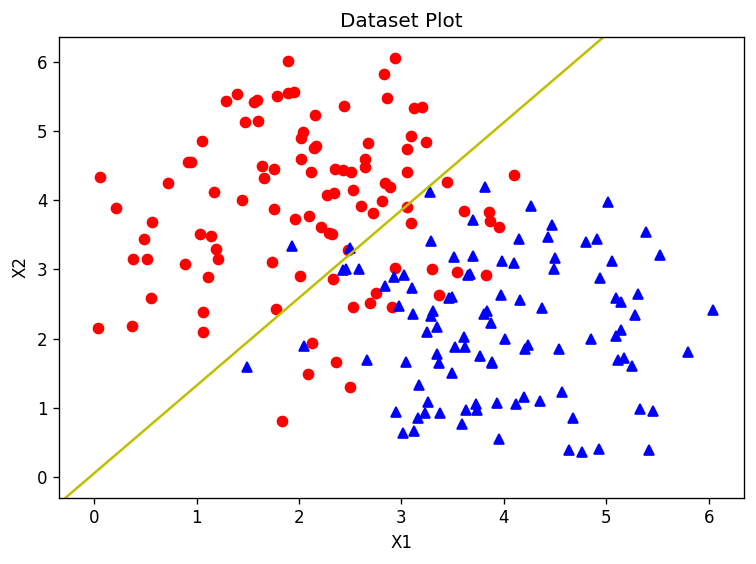

In [ ]:
fig, ax = plt.subplots(dpi=120)
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
theta_1 = x.parameters[0]
theta_2 = x.parameters[1]
theta_3 = x.bias
x_values = [0, -theta_3/theta_1]
y_values = [-theta_3/theta_2, 0]
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset Plot")
plt.axline((x_values[0], y_values[0]), (x_values[1], y_values[1]), color='y')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
class_1 = LogisticRegression()
class_1.fit(x_train, y_train)

LogisticRegression()

In [ ]:
class_1.score(x_test, y_test)

0.825